# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2024-2
---

1. Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$

---

In [7]:

import numpy as np
import matplotlib.pyplot as plt

Introduzca la velocidad de la moto:15
Introduzca la aceleración del policía:3


<ipython-input-8-9da9adae3f68>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


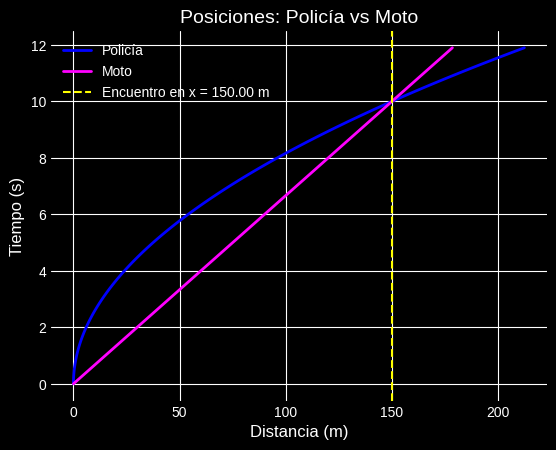

In [8]:


vm = int(input('Introduzca la velocidad de la moto:'))
a = int(input('Introduzca la aceleración del policía:'))
tf = vm / (0.5 * a)
t_interseccion = 2 * vm / a
t = np.arange(0, tf + (0.2*tf), 0.1) #Tiempo

xm = vm*t #Distancia de la moto
xp = 0.5*a*(t**2) #Distancia del policía
x_interseccion = vm * t_interseccion

# Estilo
plt.style.use('seaborn-darkgrid')
plt.style.use('dark_background')

# Graficas
plt.plot(xp, t, label='Policía', color='blue', linewidth=2)
plt.plot(xm, t, label='Moto', color='magenta', linewidth=2)
plt.axvline(x=x_interseccion, color='yellow', linestyle='--', label=f'Encuentro en x = {x_interseccion:.2f} m')

plt.title('Posiciones: Policía vs Moto', fontsize=14)
plt.xlabel('Distancia (m)', fontsize=12)
plt.ylabel('Tiempo (s)', fontsize=12)

plt.legend(loc='upper left')
plt.grid(True)
plt.show()




2. El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $ V(r) $ es el potencial en función de la distancia interatómica $ r $.
- $ \epsilon $ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $ \sigma $ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $ r $ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{2/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{2/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.


---

In [9]:
# a) Funcion para modelar el potencial Lennard-Jones
def potencial(ep,o,r):
  v = 4*ep*(((o/r)**12)-((o/r)**6))
  return v


Introduzca la profundidad del pozo de potencial(Epsilon):1
DIstancia a la cual el potencial es cero (Sigma):1


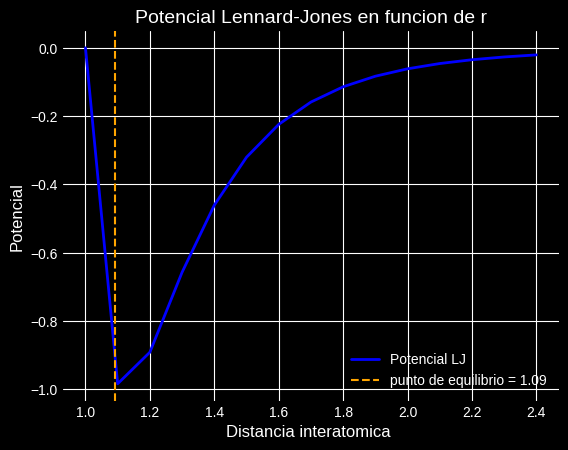

In [16]:
# b) Distancia de equilibrio rm
ep1 = float(input('Introduzca la profundidad del pozo de potencial(Epsilon):'))
o1 = float(input('DIstancia a la cual el potencial es cero (Sigma):'))

rc= ((2.5*o1))
r1 = np.arange(1,rc,0.1)
p = potencial(ep1,o1,r1)
rm = (2**(2/16))*o1

#Grafica
#plt.style.use('seaborn-darkgrid')
#plt.style.use('dark_background')

plt.plot(r1,p, label= 'Potencial LJ', color='blue', linewidth=2)
plt.axvline(x=rm, color='orange', linestyle='--', label=f'punto de equilibrio = {rm:.2f}')

plt.title('Potencial Lennard-Jones en funcion de r', fontsize=14)
plt.xlabel('Distancia interatomica ', fontsize=12)
plt.ylabel('Potencial', fontsize=12)

plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider


def potencial(epsilon, sigma, r):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def potenciales(o):
    ep = ep1
    rc = 2.5 * o
    r1 = np.arange(0.5, rc, 0.01)
    p = potencial(ep,o, r1)

    rm = (2**(2/16)) * o

    # Grafica
    plt.style.use('seaborn-darkgrid')
    plt.style.use('dark_background')
    plt.plot(r1, p, label='Potencial LJ', color='blue', linewidth=2)
    plt.axvline(x=rm, color='orange', linestyle='--', label=f'punto de equilibrio = {rm:.2f}')

    plt.title('Potencial Lennard-Jones en función de r', fontsize=14)
    plt.xlabel('Distancia interatómica (r)', fontsize=12)
    plt.ylabel('Potencial (V)', fontsize=12)

    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


ep1 = float(input('Introduzca la profundidad del pozo de potencial (Epsilon):'))
interact(potenciales, o=FloatSlider(min=0.5, max=0.7, step=0.001, value=1.5, description='Valor de sigma'))


Introduzca la profundidad del pozo de potencial (Epsilon):1


interactive(children=(FloatSlider(value=0.7, description='Valor de sigma', max=0.7, min=0.5, step=0.001), Outp…

<function __main__.potenciales(o)>


3.  El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres al español.


b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.



In [50]:

import pandas as pd
from IPython.display import display

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

print("Datos originales de alturas:")
display(alturas)
#print(alturas.head())

alturas_limpio = alturas.drop(columns=["Boys 19 (in)","Girls 19 (in)"])
alturas_limpio.columns = ["País", "Niños 19", "Niñas 19","Niños 15", "Niñas 15", "Niños 10", "Niñas 10", "Niños 5", "Niñas 5"]
display(alturas_limpio)

Datos originales de alturas:


,Country,"Average Height, Boys, 19 yo (cm)",Girls 19 (cm),Boys 19 (in),Girls 19 (in),Boys 15 (cm),Girls 15 (cm),Boys 10 (cm),Girls 10 (cm),Boys 5 (cm),Girls 5 (cm)
0,Netherlands,183.78,170.36,6 ft.,5 ft. 7 in.,177.20,167.45,146.88,146.55,119.63,118.45
1,Montenegro,183.30,169.96,6 ft.,5 ft. 7 in.,177.50,167.42,146.81,146.33,119.58,118.49
2,Estonia,182.79,168.66,6 ft.,5 ft. 6 in.,176.41,166.12,146.03,145.21,116.94,115.74
3,Bosnia and Herzegovina,182.47,167.47,6 ft.,5 ft. 6 in.,174.21,164.85,144.97,144.55,118.32,116.38
4,Iceland,182.10,168.91,6 ft.,5 ft. 7 in.,174.80,165.61,145.59,145.06,118.49,116.48
...,...,...,...,...,...,...,...,...,...,...,...
191,Papua New Guinea,163.10,156.89,5 ft. 4 in.,5 ft. 2 in.,157.73,155.22,129.98,135.88,104.16,108.08
192,Solomon Islands,163.07,156.79,5 ft. 4 in.,5 ft. 2 in.,159.48,154.16,131.86,134.06,105.48,105.70
193,Laos,162.78,153.10,5 ft. 4 in.,5 ft.,159.43,152.80,131.95,134.20,105.91,106.63
194,Timor Leste,160.13,152.71,5 ft. 3 in.,5 ft.,154.15,150.11,125.94,131.02,99.62,103.98


,País,Niños 19,Niñas 19,Niños 15,Niñas 15,Niños 10,Niñas 10,Niños 5,Niñas 5
0,Netherlands,183.78,170.36,177.20,167.45,146.88,146.55,119.63,118.45
1,Montenegro,183.30,169.96,177.50,167.42,146.81,146.33,119.58,118.49
2,Estonia,182.79,168.66,176.41,166.12,146.03,145.21,116.94,115.74
3,Bosnia and Herzegovina,182.47,167.47,174.21,164.85,144.97,144.55,118.32,116.38
4,Iceland,182.10,168.91,174.80,165.61,145.59,145.06,118.49,116.48
...,...,...,...,...,...,...,...,...,...
191,Papua New Guinea,163.10,156.89,157.73,155.22,129.98,135.88,104.16,108.08
192,Solomon Islands,163.07,156.79,159.48,154.16,131.86,134.06,105.48,105.70
193,Laos,162.78,153.10,159.43,152.80,131.95,134.20,105.91,106.63
194,Timor Leste,160.13,152.71,154.15,150.11,125.94,131.02,99.62,103.98


In [51]:
df = alturas_limpio
Colombia = df[df['País'] == 'Colombia']

altas_niñas = alturas_limpio.nlargest(10, 'Niñas 15')
altas = pd.concat([altas_niñas, Colombia])
#display(altas)

bajas_niñas = alturas_limpio.nsmallest(10, 'Niñas 15')
bajas = pd.concat([bajas_niñas, Colombia])
#display(bajas)

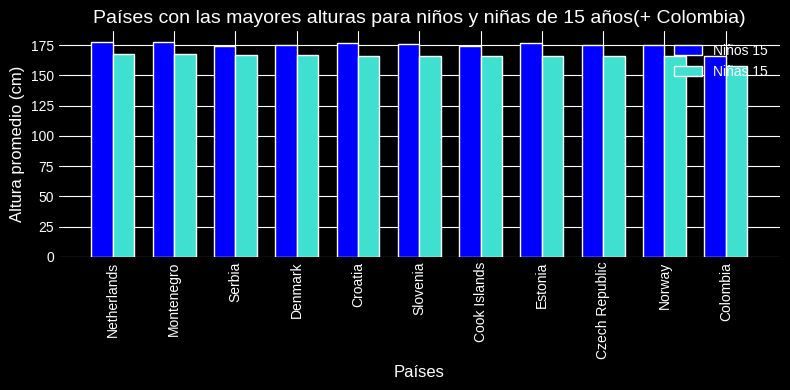

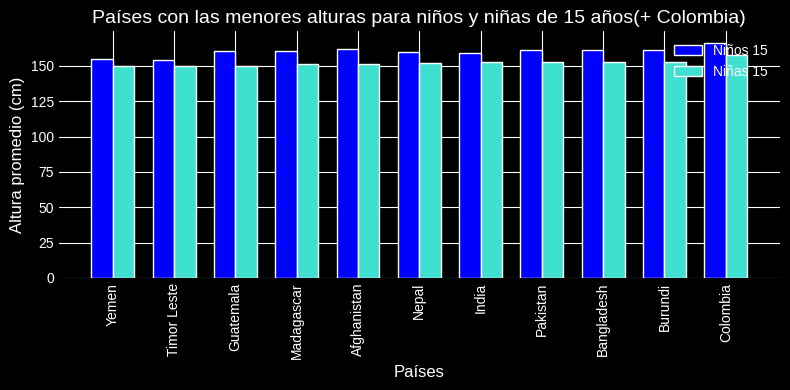

In [52]:
# Función para crear gráficos de barras
def graficar_alturas(df, titulo):
    plt.figure(figsize=(8, 4))

    x = np.arange(len(df['País']))
    bar_width = 0.35

    # Graficas
    plt.style.use('dark_background')
    plt.bar(x, df['Niños 15'], width=bar_width, label='Niños 15', color='blue', edgecolor='white')
    plt.bar(x + bar_width, df['Niñas 15'], width=bar_width, label='Niñas 15', color='turquoise', edgecolor='white')

    plt.xlabel('Países', fontsize=12)
    plt.ylabel('Altura promedio (cm)', fontsize=12)
    plt.title(titulo, fontsize=14)

    plt.xticks(x + bar_width / 2, df['País'], rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

graficar_alturas(altas, 'Países con las mayores alturas para niños y niñas de 15 años(+ Colombia)')
graficar_alturas(bajas, 'Países con las menores alturas para niños y niñas de 15 años(+ Colombia)')


In [53]:
# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
display(income)

,Country,Total Wealth (billions USD),GDP per Adult (USD),Wealth per Adult (USD),Share of World Wealth
0,United States,"$145,793","$91,340","$579,051",31.45%
1,China,"$85,107","$15,765","$76,639",18.36%
2,Japan,"$25,692","$45,449","$245,238",5.54%
3,Germany,"$17,489","$59,423","$256,985",3.77%
4,United Kingdom,"$16,261","$59,377","$309,375",3.51%
...,...,...,...,...,...
211,Anguilla,NaN,"$26,510",NaN,-
212,Cook Islands,NaN,"$26,438",NaN,-
213,Nauru,NaN,"$23,398",NaN,-
214,Tuvalu,NaN,"$7,780",NaN,-


In [54]:
df = alturas_limpio
df2 = income
df2.rename(columns={'Country': 'País'}, inplace=True)
df2.rename(columns={'GDP per Adult (USD)': 'GPD'}, inplace=True)
merged_df = pd.merge(df, df2, on='País', how='inner')


display(merged_df)

,País,Niños 19,Niñas 19,Niños 15,Niñas 15,Niños 10,Niñas 10,Niños 5,Niñas 5,Total Wealth (billions USD),GPD,Wealth per Adult (USD),Share of World Wealth
0,Netherlands,183.78,170.36,177.20,167.45,146.88,146.55,119.63,118.45,"$5,422","$72,065","$400,828",1.2%
1,Montenegro,183.30,169.96,177.50,167.42,146.81,146.33,119.58,118.49,$36,"$12,231","$75,759",0.01%
2,Estonia,182.79,168.66,176.41,166.12,146.03,145.21,116.94,115.74,$80,"$33,405","$77,360",0.02%
3,Bosnia and Herzegovina,182.47,167.47,174.21,164.85,144.97,144.55,118.32,116.38,$87,"$8,453","$33,122",0.02%
4,Iceland,182.10,168.91,174.80,165.61,145.59,145.06,118.49,116.48,$118,"$99,550","$467,795",0.03%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Mozambique,164.30,155.42,160.29,153.83,134.18,137.16,110.16,111.34,$16,"$1,097","$1,117",-
188,Papua New Guinea,163.10,156.89,157.73,155.22,129.98,135.88,104.16,108.08,$43,"$5,090","$8,449",-
189,Solomon Islands,163.07,156.79,159.48,154.16,131.86,134.06,105.48,105.70,$6,"$3,699","$15,596",-
190,Laos,162.78,153.10,159.43,152.80,131.95,134.20,105.91,106.63,$35,"$4,364","$7,916",0.01%


In [74]:
dfm = merged_df
altas19 = dfm.nlargest(10,'Niñas 19')
altas19_orden = altas19.sort_values(by='GPD', ascending=True)


display(altas19_orden)

#bajas19 = dfm.nsmallest(10, 'Niños 19')

#display(bajas19)

,País,Niños 19,Niñas 19,Niños 15,Niñas 15,Niños 10,Niñas 10,Niños 5,Niñas 5,Total Wealth (billions USD),GPD,Wealth per Adult (USD),Share of World Wealth
12,Serbia,180.74,168.29,174.38,166.82,144.93,146.07,118.98,117.60,$179,"$11,538","$32,816",-
1,Montenegro,183.30,169.96,177.50,167.42,146.81,146.33,119.58,118.49,$36,"$12,231","$75,759",0.01%
7,Latvia,181.17,168.81,172.60,164.36,144.09,144.03,118.69,116.82,$127,"$25,657","$87,270",0.03%
13,Lithuania,180.72,167.63,174.08,165.19,144.72,144.61,119.25,117.82,$136,"$29,276","$63,508",0.03%
6,Czech Republic,181.19,167.96,174.76,165.88,144.67,144.61,117.86,116.05,$701,"$33,177","$82,240",0.15%
2,Estonia,182.79,168.66,176.41,166.12,146.03,145.21,116.94,115.74,$80,"$33,405","$77,360",0.02%
0,Netherlands,183.78,170.36,177.20,167.45,146.88,146.55,119.63,118.45,"$5,422","$72,065","$400,828",1.2%
3,Bosnia and Herzegovina,182.47,167.47,174.21,164.85,144.97,144.55,118.32,116.38,$87,"$8,453","$33,122",0.02%
5,Denmark,181.89,169.47,175.00,166.66,144.76,145.55,117.44,118.06,"$1,935","$83,561","$426,494",0.42%
4,Iceland,182.10,168.91,174.80,165.61,145.59,145.06,118.49,116.48,$118,"$99,550","$467,795",0.03%


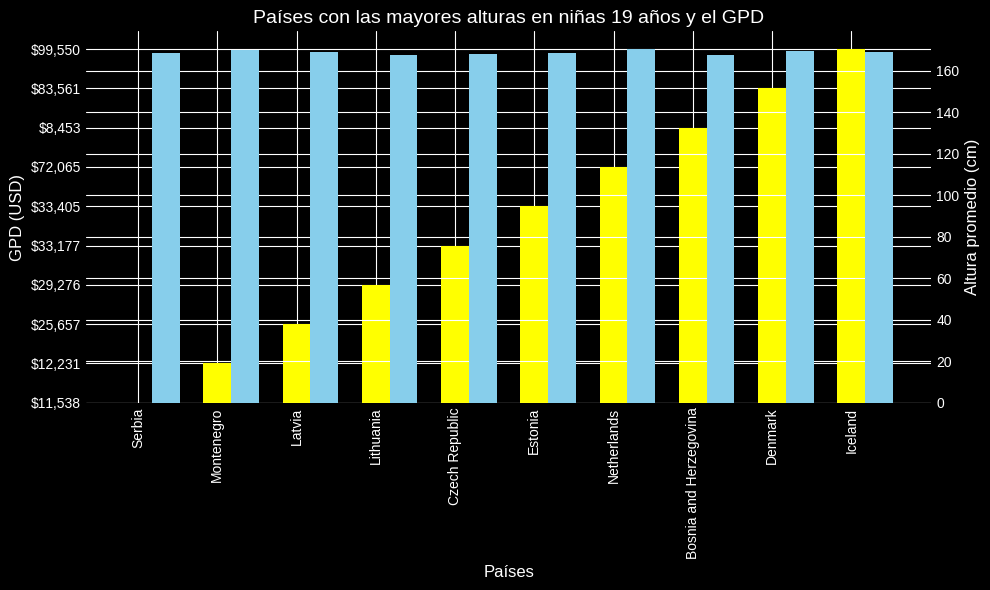

In [75]:
def graficar_gdp(dfm, titulo):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    x = np.arange(len(dfm['País']))
    bar_width = 0.35

    plt.style.use('dark_background')
    # altura de niñas en eje Y izquierdo
    ax1.bar(x, dfm['GPD'], width=bar_width, label='Niñas 19', color='yellow')
    ax1.set_xlabel('Países', fontsize=12)
    ax1.set_ylabel('GPD (USD)', fontsize=12,)

    # Eje X, países
    ax1.set_xticks(x)
    ax1.set_xticklabels(dfm['País'], rotation=90)

    #  eje Y derecho con GPD
    ax2 = ax1.twinx()
    ax2.bar(x + bar_width, dfm['Niñas 19'], width=bar_width, label='GDP', color='skyblue')
    ax2.set_ylabel('Altura promedio (cm)', fontsize=12)

    plt.title(titulo, fontsize=14)
    plt.tight_layout()
    plt.show()

graficar_gdp(altas19_orden, 'Países con las mayores alturas en niñas 19 años y el GPD')


#Conclusion
En la grafica no se ologra evidenciar algun tipo de relacion entre el GPD y la altura de las niñas de 19 años,para este caso tenemos a lso 10 paises con la altura promedio mas alta en niñas de 19 años, no se muestra que entre mas altas mas alto es el GPD.
Montenegro, Netherlands y Iceland, tienen las niñas mas altas, pero sus valores de GPD son muy distintos, no se nota relacion directa o inversa.

In [ ]:
M